In [2]:
import warnings
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
def quadratic1_(x,gamma=4):
    return gamma*(x**2) + x + 1 #valeur de la fonction
def cubic1_(x,gamma=4):
    return x**3 + gamma*x**2 + x + 1 #valeur de la fonction
def multitrous1_(x,gamma=4):
    return 20*np.cos(x**2) + (gamma * x**2) #valeur de la fonction
def quadratic2_(x,gamma=4):
    return quadratic1_(x[0],gamma[0])+quadratic1_(x[1],gamma[1]) #valeur de la fonction
def cubic2_(x,gamma=10):
    return cubic1_(x[0],gamma)+cubic1_(x[1],gamma) #valeur de la fonction
def multitrous2_(x,gamma=4):
    return multitrous1_(x[0],1)+multitrous1_(x[1],gamma) #valeur de la fonction


In [4]:
def create_system (dim,cond=10,seed=100):
    np.random.seed(seed)
    A=0.1*np.random.uniform(-math.sqrt(cond),math.sqrt(cond),size=(dim,dim))
    A=np.triu(A)
    # on remplace la diagonale de A par des valeurs aléatoires positives entre 1 et sqrt(cond)
    A=A-np.diag(np.diag(A))+np.diag(np.random.uniform(1.,math.sqrt(cond),size=(dim))) 
    # on impose les deux premiers termes de la diagonale diagonale de A pour fixer le conditionnement
    A[0,0]=1.
    A[1,1]=math.sqrt(cond)
    b=1.*np.random.randint(-10,10,size=(dim))
    A=A.T @ A
    return A,b

In [5]:
def Rosenbrock(x,gamma=100):
    return (x[0]-1)**2+gamma*(x[0]**2-x[1])**2 #valeur de la fonction
def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + sum(x**2 - A * np.cos(2 * np.pi * x))
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum_sq_term = -b * np.sqrt((1/n) * sum(x**2))
    cos_term = (1/n) * sum(np.cos(c * x))
    return -a * np.exp(sum_sq_term) - np.exp(cos_term) + a + np.exp(1)

In [6]:
def distance(a, b):
    d = (a - b) ** 2
    d = d.sum()
    return np.sqrt(d)

In [7]:
def partial(f, x, i=0, dx=1e-8):
    """Computes i-th partial derivative of f at point x.
    
    Args:
        f: objective function.
        x: point at which partial derivative is computed.
        i: coordinate along which derivative is computed.
        dx: slack for finite difference.
        
    Output:
        (float)

    """
    h = np.zeros(x.size)
    h[i] = dx
    return (f(x + h) - f(x - h)) / (2*dx)

def gradient(f, x, dx=1e-8):
    """Computes gradient of f at point x.
    
    Args:
        f: objective function.
        x: point at which gradient is computed.
        dx: slack for finite difference of partial derivatives.
        
    Output:
        (ndarray) of size domain of f.
        
    """
    # 👷 À VOUS DE JOUER 👷
    # return grad
    return np.array([partial(f, x, i=i, dx=dx) for i in range(len(x))])

# Cette fonction génère la taille du pas optimal vérifiant le critère d'Amijo

def backtrack(x0, f , dir_x, 𝛼 = 0.4, 𝛽 = 0.8):
    """
    Description: 
    Parameters:
    x0: point actuel
    f: fonction à minimiser
    dir_x: direction dans laquelle on souhaite aller
    
    Output
    valeur du pas optimal
    """
    
    # 👷 À VOUS DE JOUER 👷
    # return eta
    𝜂 = 1
    #print(f(x0 + 𝜂 * dir_x))
    #print(f(x0) + 𝛼 * 𝜂 * np.dot(dir_x.T, gradient(f, x0)))
    while ((f(x0 + 𝜂 * dir_x)) >= (f(x0) + 𝛼 * 𝜂 * np.dot(dir_x.T, gradient(f, x0)))):
        𝜂 *= 𝛽
    return 𝜂

def desc_grad_opti (f,x0,eps=1E-6, 𝛼=0.4, 𝛽=0.8):
    # 👷 À VOUS DE JOUER 👷
    # return xk
    
    xk = np.array([x0])
    d = eps + 1 # just so it runs once
    while (d > eps):
        grad = gradient(f, xk[-1])
        𝜂 = backtrack(xk[-1], f, -grad, 𝛼=𝛼, 𝛽=𝛽)
        new_x = xk[-1] - 𝜂 * grad
        d = distance(xk[-1], new_x) # distance entre la derniere valeur et new_x
        xk = np.append(xk, [new_x], axis=0)
    return xk


In [39]:
def pipeline(f, press=[1E-5], seed=0):
    # press: array[] of eps
    # seed: useless atm
    dim, cond = 10, 100
    rng = np.random.default_rng(seed)
    x0 = rng.integers(low=0, high=10, size=dim)
    
    color = ['blue', 'green', 'red', 'yellow', 'purple', 'orange', 'black', 'gray', 'cyan']
    for ii, pres in enumerate(press):
        #quadra_n
        res_1 = desc_PR_opti(f,x0, eps=pres) # A MODIFIER POUR VOTRE VERSION DE LA DESCENTE
        res_2 = desc_FR_opti(f,x0, eps=pres)
        x_exact_1 = np.round(res_1[-1])
        x_exact_2 = np.round(res_2[-1])
        print("x_calculé",x_exact)

        distances_1 = res_1 - x_exact_1
        distances_2 = res_2 - x_exact_2
        
        distances_1 = np.array([np.linalg.norm(d, ord=2) for d in distances_1])
        distances_2 = np.array([np.linalg.norm(d, ord=2) for d in distances_2])
        
        plt.plot(distances_1, color=color[0], label="PR applied on Ackley, {}: {} itérations".format(pres, len(res_1)))
        plt.plot(distances_2, color=color[1], label="FR applied on Ackley, {}: {} itérations".format(pres, len(res_2)))
        
    plt.title('Descente du gradient FR et PR')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()

In [78]:
def quadraticn_(x):
    A,b = create_system(10,100)
    x_exact=np.zeros(10)+1.
    b=A@x_exact
    return (x.T@A@x)/2-b.T@x #valeur de la fonction

In [9]:
def desc_PR_opti(f, x0, eps=1E-6):
    # Initialisation
    xk = x0
    gk = np.array(gradient(f, xk))
    dk = -gk
    
    L = [xk]
    
    max_iterations = 100

    for i in range(max_iterations):
        alpha = line_search_2(f, xk, dk)  # Trouver la longueur de pas
        xk_1 = xk + alpha * dk  # Mettre à jour la position

        gk_1 = np.array(gradient(f, xk_1))
        beta = np.dot(gk_1, gk_1 - gk) / np.dot(gk, gk)  # Calculer le coefficient de Polack-Ribière

        if np.linalg.norm(gk_1) < eps:
            break

        dk = -gk_1 + beta * dk  # Mettre à jour la direction de recherche
        xk = xk_1
        gk = gk_1
        
        L.append(xk)

    return L

def line_search_2(f, xk, dk, max_iterations=100, alpha_0=1.0, rho=0.5, c=1e-4):
    alpha = alpha_0
    iteration = 0
    
    b = False
    
    while iteration < max_iterations and not b :
        if f(xk + alpha * dk) <= f(xk) + c * alpha * np.dot(np.array(gradient(f, xk)).T, dk) :
            b = True
            
        else :
            alpha = rho * alpha
            iteration += 1
    
    return alpha

In [10]:
def desc_FR_opti(f, x0, eps=1E-6):
    xk = x0
    gk = np.array(gradient(f, xk))
    dk = -gk
    iteration = 0
    
    L = [xk]
    
    max_iterations = 100  # L'algo est ici testé pour 100 itérations
    
    while np.linalg.norm(gk) > eps and iteration < max_iterations :
        alpha = line_search(f, xk, dk)  # Trouver la longueur de pas optimale
        
        xk_1 = xk + alpha * dk  # Mettre à jour la solution
        gk_1 = np.array(gradient(f, xk_1))  # Calculer le nouveau gradient
        
        beta = np.dot(gk_1, gk_1) / np.dot(gk, gk)  # Calculer le coefficient de mise à jour
        
        dk_1 = -gk_1 + beta * dk  # Calculer la nouvelle direction
        
        xk = xk_1
        gk = gk_1
        dk = dk_1
        
        L.append(xk)
        
        iteration += 1
        
    return L

def line_search(f, xk, dk, max_iterations=100, alpha_0=1.0, rho=0.5, c=1e-4):
    alpha = alpha_0
    iteration = 0
    
    b = False
    
    while iteration < max_iterations and not b :
        if f(xk + alpha * dk) <= f(xk) + c * alpha * np.dot(np.array(gradient(f, xk)).T, dk) :
            b = True
            
        else :
            alpha = rho * alpha
            iteration += 1
    
    return alpha

In [53]:
#np.random.default_rng?

In [37]:
dim, cond = 2, 100
A,b = create_system(dim,cond)
x_exact=np.zeros(dim)+1.
#x0=np.ones(dim) * 3
#x0 = np.random.randint(0, 10, size=dim)

b=A@x_exact

#pipeline(quadraticn_, press=[1E-6, 1E-4, 0.01, 2])

x_calculé [1. 1.]


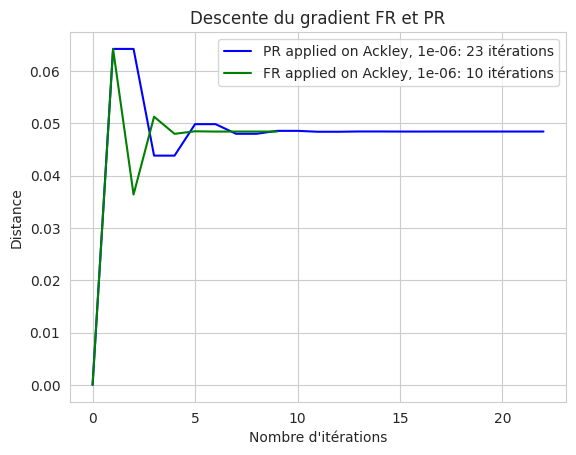

In [40]:
pipeline(ackley, press=[1E-6])

Les courbes se superposent parfaitement, le pas n'affecte que le nombre d'itération et la précision du résultat final

In [123]:
def pipeline_𝛼(f=Rosenbrock, dim = 10, cond = 100, 𝛼 = [0.4], seed=0):
    # press: array[] of eps
    # seed: useless atm
    rng = np.random.default_rng(seed)
    x0 = rng.integers(low=0, high=10, size=dim)
    color = ['blue', 'green', 'red', 'yellow', 'purple', 'orange', 'black', 'gray', 'cyan']
    for ii, a in enumerate(𝛼):
        #quadra_n
        res = desc_grad_opti(f,x0, eps=1E-5, 𝛼=a)
        x_exact = np.round(res[-1])
        print("x_calculé",x_exact)

        distances = res - x_exact
        distances = np.array([np.linalg.norm(d) for d in distances])
        
        plt.plot(distances, color=color[ii], label="{}, {}: {} itérations".format(f.__name__, a, len(res)))
    
    plt.title('Descente du gradient')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Distance')
    plt.legend()

In [136]:
def pipeline_𝛽(f=Rosenbrock, dim = 10, cond = 100, 𝛽 = [0.4], seed=0):
    # press: array[] of eps
    # seed: useless atm
    rng = np.random.default_rng(seed)
    x0 = rng.integers(low=0, high=10, size=dim)
    color = ['blue', 'green', 'red', 'yellow', 'purple', 'orange', 'black', 'gray', 'cyan']
    for ii, b in enumerate(𝛽):
        #quadra_n
        res = desc_grad_opti(f,x0, eps=1E-5, 𝛽=b)
        x_exact = np.round(res[-1])
        print("x_calculé",x_exact)

        distances = res - x_exact
        distances = np.array([np.linalg.norm(d) for d in distances])
        
        plt.plot(distances, color=color[ii], label="{}, {}: {} itérations".format(f.__name__, b , len(res)))
    
    plt.title('Descente du gradient')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Distance')
    plt.legend()

𝛽

x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


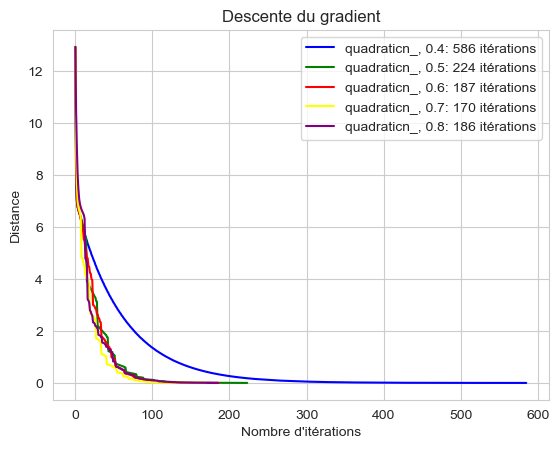

In [158]:
A,b = create_system(dim,cond)
x_exact=np.zeros(dim)+1.
#x0=np.ones(dim) * 3
#x0 = np.random.randint(0, 10, size=dim)

b=A@x_exact

pipeline_α(quadraticn_, 𝛼 = [0.4,0.5, 0.6, 0.7, 0.8], seed=3)

x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
x_calculé [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


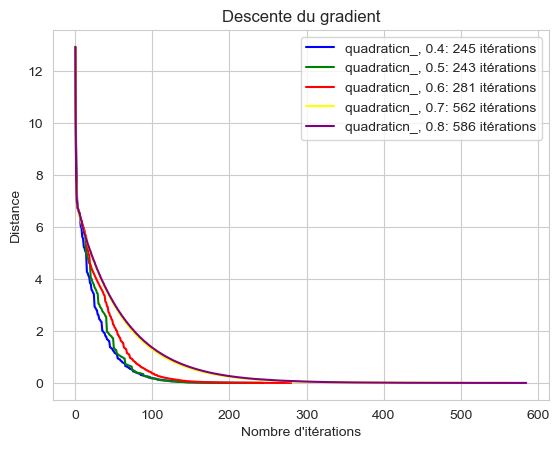

In [159]:
A,b = create_system(dim,cond)
x_exact=np.zeros(dim)+1.
#x0=np.ones(dim) * 3
#x0 = np.random.randint(0, 10, size=dim)

b=A@x_exact
pipeline_𝛽(quadraticn_, 𝛽 = [0.4,0.5, 0.6, 0.7, 0.8], seed=3)

x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]


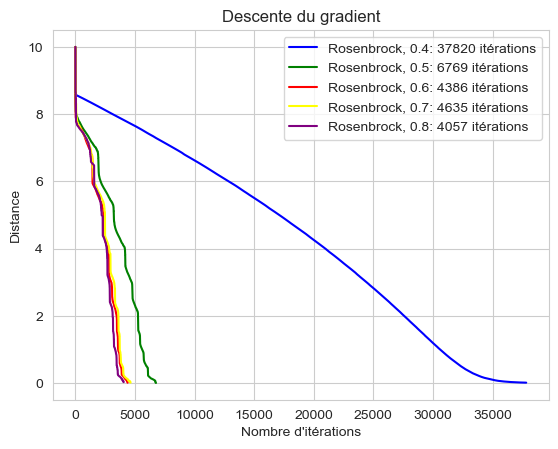

In [148]:
pipeline_α(dim=5, 𝛼 = [0.4,0.5, 0.6, 0.7, 0.8], seed=4)

In [146]:
# mesurer temps moyen sur plusieurs seed pour meilleur alpha

x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]
x_calculé [1. 1. 8. 5. 9.]


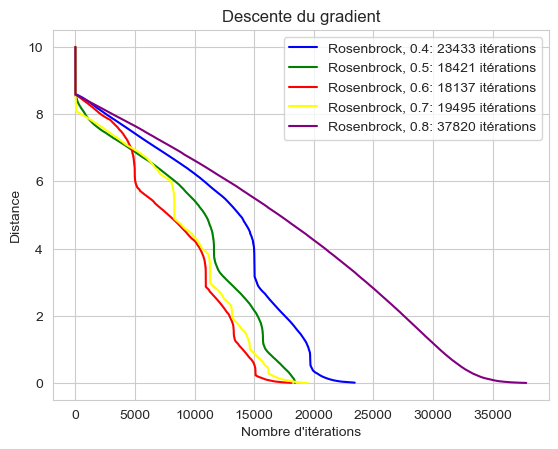

In [149]:
pipeline_𝛽(dim=5, 𝛽 = [0.4,0.5, 0.6, 0.7, 0.8], seed=4)

In [48]:
def mean(times):
    return np.mean([t.average for t in times])

def pipeline_time(fdg, fn = [Rosenbrock, rastrigin, ackley], seed=0, amplitude=10, dim=10, pts_nb=3):
    # differente fc
        # different pts random
            # on recup le tps
        # on mean les tps
    # on renvois la liste des temps (dans le mm ordre que les fc donnée)
    rng = np.random.default_rng(seed)
    x0s = [rng.integers(low=0, high=amplitude, size=dim) for i in range(pts_nb)]
    times_fn = []
    for f in fn:
        times = []
        for x0  in x0s:
            time = %timeit -n 1 -r 1 -o fdg(f,x0, eps=1E-5) # A CHANGER POUR VOTRE DESCENTE
            times.append(time)
        times_fn.append(mean(times))
    return times_fn

In [49]:
time_desc_PR = pipeline_time(desc_PR_opti)
time_desc_PR

196 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
168 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
174 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
52.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
54.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
35.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
148 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
130 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
134 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[0.17927236666582758, 0.047672066666564206, 0.13742533333303678]

In [50]:
time_desc_FR = pipeline_time(desc_FR_opti)
time_desc_FR

81.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
114 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
82.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
17.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
36.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
28.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[0.09295466666905365, 0.022227999999207288, 0.019545499999367166]

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Rosenbrock_FR'),
  Text(1, 0, 'Rastrigin_FR'),
  Text(2, 0, 'Ackley_FR'),
  Text(3, 0, 'Rosenbrock_PR'),
  Text(4, 0, 'Rastrigin_PR'),
  Text(5, 0, 'Ackley_PR')])

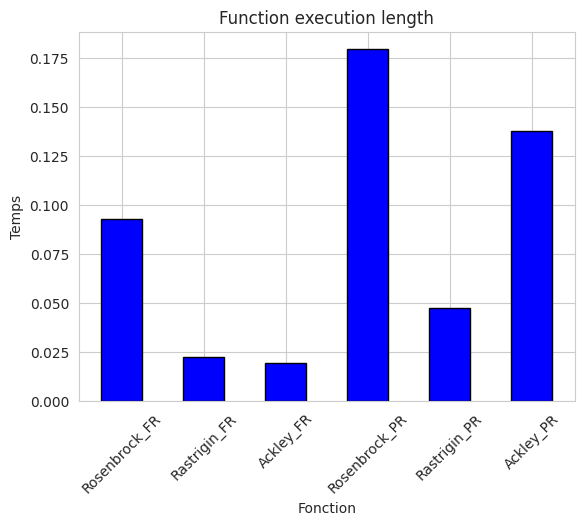

In [52]:
fn = ['Rosenbrock_FR', 'Rastrigin_FR', 'Ackley_FR', 'Rosenbrock_PR', 'Rastrigin_PR', 'Ackley_PR']
plt.bar(fn, go, color='blue', width=0.5, edgecolor='black')
plt.title('Function execution length')
plt.xlabel('Fonction')
plt.ylabel('Temps')
plt.xticks(rotation=45) # n'a d'interet que je si je prend les ratio de difference

In [45]:
# NOT WORKING FOR NOW
#kek = pipeline_time()
#kek

TypeError: pipeline_time() missing 1 required positional argument: 'fdg'

In [51]:
go = time_desc_FR + time_desc_PR
go

[0.09295466666905365,
 0.022227999999207288,
 0.019545499999367166,
 0.17927236666582758,
 0.047672066666564206,
 0.13742533333303678]

In [105]:
a = %timeit -n 1 -r 1 -o desc_grad_opti(Rosenbrock,[2, 3, 4], eps=1E-5)

25.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
